# Feature Pruning via Hierarchical Clustering

This notebook performs feature pruning based on hierarchical clustering
of motif features and visual inspection of cluster structure.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, fcluster

RANDOM_SEED = 42
CLUSTER_DISTANCE_THRESHOLD = 21


In [ ]:
# Expect input CSV with samples as rows and motifs as columns

input_cav_file = r"\Infected_vs_Naive_all_newnor\data\model\07_best_model_csv\best_model_Infected_vs_Naive\Top_400_features.csv"
hits = pd.read_csv(
    input_cav_file,
    index_col="sample_name"
)

train_data = np.log2(hits.drop(columns=["label"]) + 1)

In [4]:
row_groups = pd.Series(hits["label"] == "other", index=hits.index)
row_palette = {False: "lightcoral", True: "lightgray"}
row_colors = row_groups.map(row_palette)

C:\Users\JonathanG50\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\JonathanG50\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


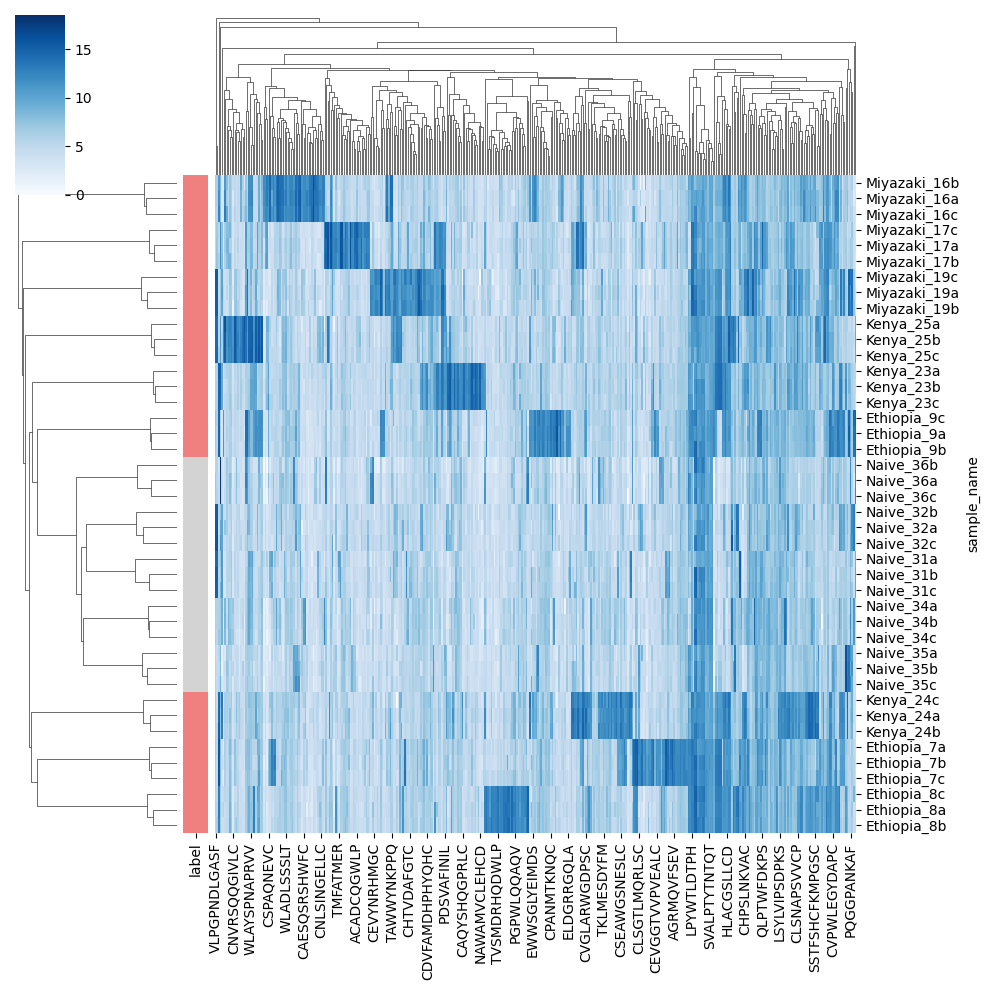

In [6]:
cm = sns.clustermap(
        train_data,
        cmap="Blues",
        col_cluster=True,
        yticklabels=True,
        row_colors=row_colors
    )

In [7]:
from scipy.cluster.hierarchy import dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

col_linkage = cm.dendrogram_col.linkage
col_clusters = fcluster(
    col_linkage,
    t=CLUSTER_DISTANCE_THRESHOLD,
    criterion="distance"
)


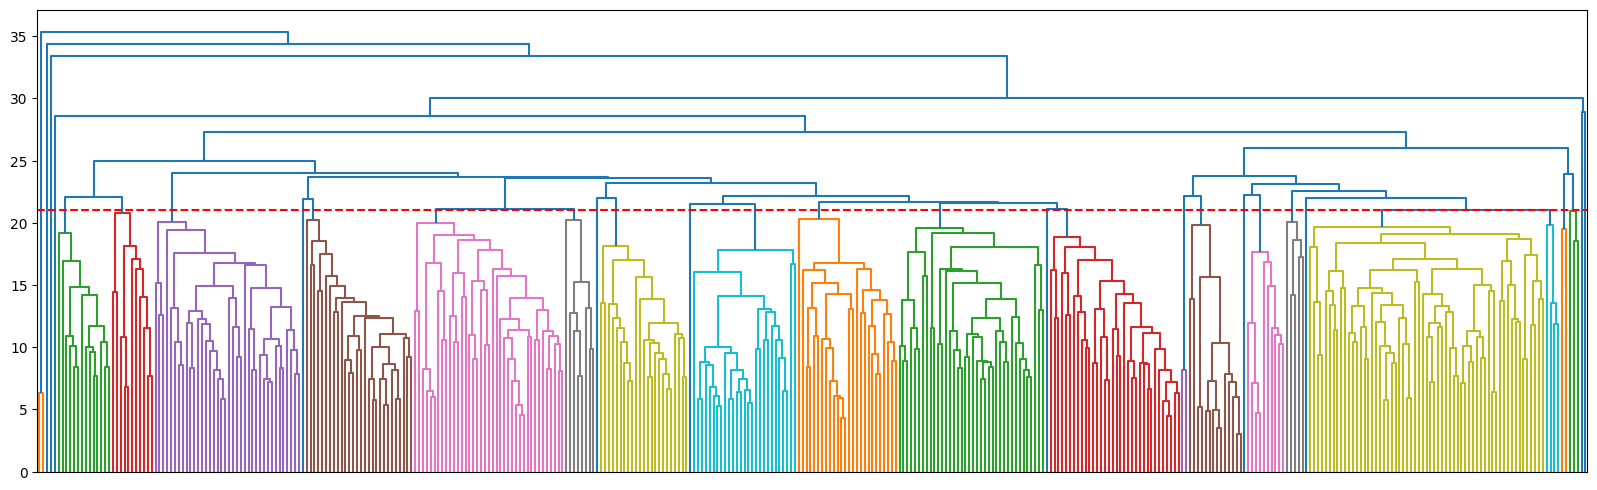

In [8]:
plt.figure(figsize=(20, 6))
r = dendrogram(
    col_linkage,
    color_threshold=CLUSTER_DISTANCE_THRESHOLD,
    no_labels=True
)
plt.axhline(CLUSTER_DISTANCE_THRESHOLD, color="red", linestyle="--")
plt.show()

dendrogram_colors = r["leaves_color_list"]
column_order = np.array(r["ivl"]).astype(int)

motifs_ordered = train_data.columns[column_order]
ordered_col_colors = pd.Series(dendrogram_colors, index=motifs_ordered)


C:\Users\JonathanG50\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\JonathanG50\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


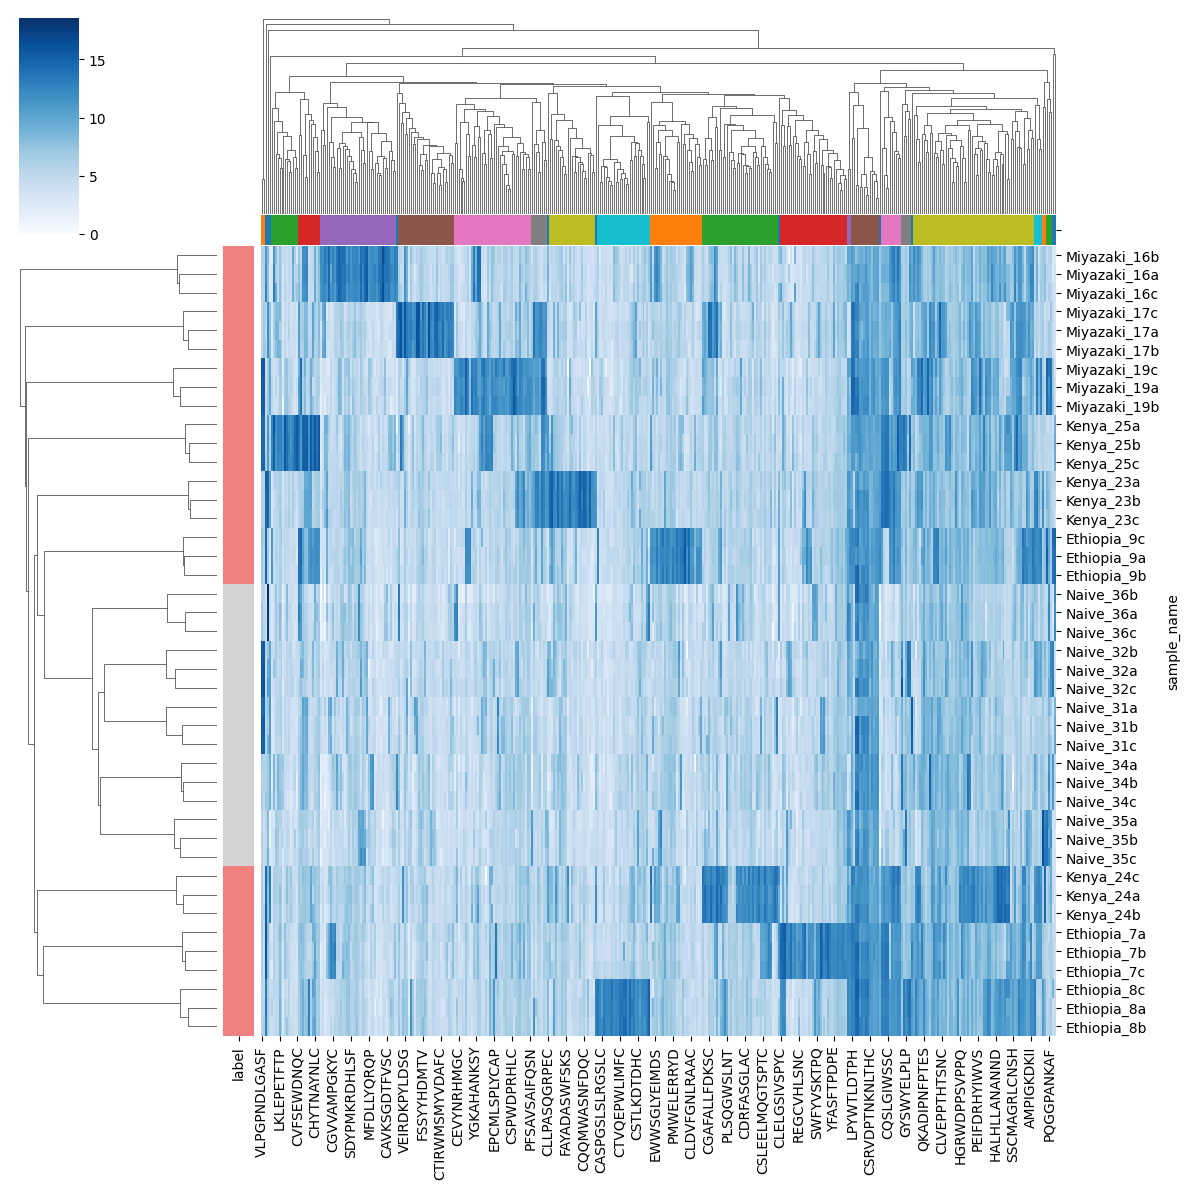

In [10]:
sns.clustermap(
    train_data,
    cmap="Blues",
    col_cluster=True,
    row_cluster=True,
    col_colors=ordered_col_colors,
    row_colors=row_colors,
    figsize=(12, 12)
)

plt.show()
